# Learning Outcomes
1. Geometric Transformation (rotation, translation, affine transformation, perspective transformation)
2. Drawing Functions: line., circle, ellipse, rectangle and text
3. Bitwise Operators (AND, OR, XOR, NOT)
4. Convolutions (CNN, Smoothing, Sharpnening)

# Setup

In [24]:
!pip install scipy

                                              0.0/44.0 MB ? eta -:--:--
                                              0.1/44.0 MB 1.7 MB/s eta 0:00:27
                                              0.2/44.0 MB 2.0 MB/s eta 0:00:23
                                              0.3/44.0 MB 2.4 MB/s eta 0:00:19
                                              0.4/44.0 MB 2.3 MB/s eta 0:00:20
                                              0.5/44.0 MB 2.3 MB/s eta 0:00:20
                                              0.6/44.0 MB 2.4 MB/s eta 0:00:19
                                              0.6/44.0 MB 2.0 MB/s eta 0:00:22
                                              0.8/44.0 MB 2.3 MB/s eta 0:00:19
                                              0.9/44.0 MB 2.4 MB/s eta 0:00:19
                                              1.1/44.0 MB 2.4 MB/s eta 0:00:18
                                              1.1/44.0 MB 2.3 MB/s eta 0:00:19
     -                                        1.1/44.0 MB 2


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install matplotlib

In [1]:
import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np


# from scipy.spatial.distance import euclidean
# import math
import numpy as np
import matplotlib.pyplot as plt

def show_img(window_name, img, adjust=False):
    """3 arguments: window name, source images, boolean to adjust to screen size"""
    if adjust:
        cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    else:
        cv.namedWindow(window_name)

    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()


def plt_img(img, title=None):
    if len(img.shape)==3:
        plt.imshow(img)
    elif len(img.shape)==2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        raise Exception('Incorrect image dimension')
        
    if title is not None:
        plt.title(title)
        
    plt.xticks([]), plt.yticks([])


# Geometric Transformation

In [ ]:
# (x  = (a b c (x
#  y)    d e f) y
#               1)

# Translation
# M = (1 0 x
#      0 1 y)
# postive x = move right
# positive y = move down

# Rotation
# M = (center, angle, scale)

## Affine Transformation

### Translation

In [6]:
path=r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\lena.jfif"
img = cv.imread(path)

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1,0,tx], [0,1,ty]])

# perform transformation
dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("translation", dst)

### Rotation

In [8]:
#center, angle, scale
yc, xc = h // 2, w //2
angle = -270 # positive - counterclockwise, negative - clockwise

# get transformation matrix
M = cv.getRotationMatrix2D((xc, yc), angle, 1)

dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

In [9]:
angle=90
M = cv.getRotationMatrix2D((xc, yc), angle, 1)

#account for translation
M[0,2]+= tx
M[1,2]+= ty
dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("transformed", dst)


### Custom affine Transformation

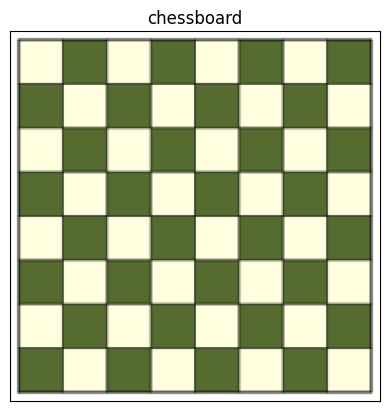

In [10]:
path=r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\chessboard.png"
img = cv.imread(path)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt_img(img, title="chessboard")

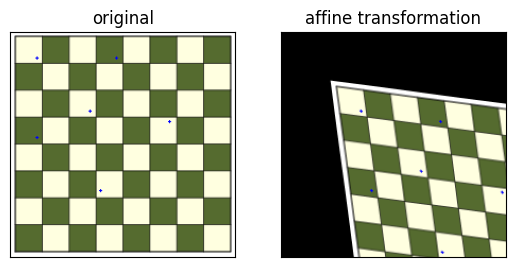

In [13]:
img_copy = img.copy()
h, w = img_copy.shape[:2]

# pair of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)

# get M
M = cv.getAffineTransform(p0, p1)

# perform transformation
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p1:
    cv.circle(img,  (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transformation")
plt.show()

In [14]:
dst[75,75,:]

array([  0,   0, 255], dtype=uint8)

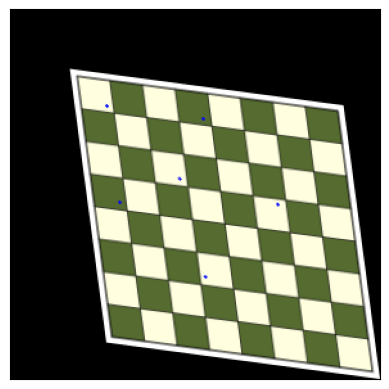

In [16]:
dst = cv.warpAffine(img_copy, M, (w+75, h+75))
plt_img(dst)
plt.show()

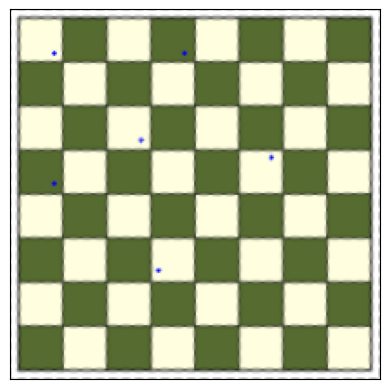

In [17]:
M_inv = cv.getAffineTransform(p1, p0)
img_restored = cv.warpAffine(dst, M_inv, (w, h))

plt_img(img_restored)
plt.show()

### Perspective Transformation

In [18]:
path=r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\name_card_sample.webp"
img = cv.imread(path)
show_img("name card", img)

# (tx  = (a b c (x
#  ty)    d e f) y
#  t      g h i  1)

# 4 pairs of point

In [23]:
p = []
img_copy=img.copy()
# top left, top right, bottom right, bottom left

# mouse callback function
def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        p.append((x,y))
        cv.circle(img, (x,y), 2, (0,0,255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(119, 106)
(767, 44)
(913, 268)
(72, 390)


In [25]:
from scipy.spatial.distance import euclidean

In [26]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp, adjust=True)

### Drawing Functions
- Line
- Circle
- Ellipse
- Rectangle
- Text

### Line

In [27]:
path=r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 4\dog.jfif"
img = cv.imread(path)
print(img.shape)
# height, width, channel

(168, 300, 3)


In [28]:
img_copy = img.copy()
cv.line(img_copy, (30, 80), (100, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("img", img_copy)

### Circle

In [29]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

### Ellipse

In [30]:
img_copy = img.copy()
center = (145, 50)
axes = (50, 25) # try (25, 50)
angle = 0 # try 90

cv.ellipse(img_copy, center, axes, angle, 0, 360, (100, 0, 50), 2, cv.LINE_4) # try 360->180
show_img("img", img_copy)

### Rectangle

In [31]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

### Text

In [32]:
img_copy = img.copy()
cv.putText(img_copy, "This dog is adorable!", (20, 145), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 100), 2)
show_img("img", img_copy)

In [41]:
# create a bulleye

img = np.zeros((400, 400), dtype = np.uint8)

radius = np.arange(20, 200, 15)
yc, xc = img.shape[0] // 2, img.shape[1] // 2

for r in radius: 
    cv.circle(img, (xc, yc), r, 255, 2, cv.LINE_8)
    
# put text
cv.putText(img, "Bulleye", (15, 385), cv.FONT_HERSHEY_SIMPLEX, 0.7, 255)
    
show_img("img", img)

### Create a Simple App

In [36]:
# trackbar

WHITE = (255 ,255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

# trackbar function, mousecallback function, while loop
def nothing(x):
    pass

p0 = p1 = (0,0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos("thickness", "window")
        if d==0:
            d==1
        i = cv.getTrackbarPos("color", "window")
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow("window", img)
        
img = np.zeros((400, 400, 3), np.uint8)
cv.namedWindow("window")
cv.createTrackbar("color", "window", 0, 6, nothing)
cv.createTrackbar("thickness", "window", 0, 10, nothing)
cv.setMouseCallback("window", mouse)

while (1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    
    if k == 27:
        break
    
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

## Bitwise Operations
- AND, OR, XOR, NOT

In [37]:
# AND, OR, NOT -> ez
# XOR -> same-0, diff-255

In [38]:
rect = np.zeros((400, 400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [39]:
# AND
res = cv.bitwise_and(rect, circle)
show_img("AND", res)

In [40]:
# OR
res = cv.bitwise_or(rect, circle)
show_img("OR", res)

In [5]:
# XOR
res = cv.bitwise_xor(rect, circle)
show_img("XOR", res)

### The bitwise operation are especially important for masking

In [8]:
img = cv.imread("images/dog.jfif")
h, w = img.shape[:2]

mask = np.zeros((h, w), dtype=np.uint8)
cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)

show_img("face", face)

### Identity Kernel

In [42]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

path=r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\opencv_logo.png"
img = cv.imread(path)
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identify", dst)

### Use cases
- sharpening
- smoothing (a way to denoise)
- cool effect

In [10]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("sharpening", dst)

In [43]:
# blurring

kernel = np.ones((3, 3)) / 9

print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [46]:
#use built in function
blur_1=cv.blur(img,(5,5))
cv.imshow("filter2D", dst)
show_img("built-in",blur_1)

In [44]:
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("blur", dst)

In [48]:
# better
# sharpened = image + (image - blur) x amount

sharp = cv.addWeighted(img, 1.5, dst, -0.5, 0)
show_img("sharp", sharp)

### OpenCV Image Blurring Functions
- `cv.blur`: smoothing (average filter)
- `cv.GaussianBlur()`: Gaussion smoothing. Blur effect of Gaussian blurring is more satisfactory.
- `cv.medianBlur()`: median filter. Good for removing salt and pepper noise.
- `cv.bilateralFilter`: edge-preserving filter

Types of noise:
random noise, Gaussian noise, and salt and pepper noise.

## exercise 1

In [7]:
import cv2
import imutils
from matplotlib import pyplot as plt

# Step 1: Read and display the input image
input_image_path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\lena.jfif"
image = cv2.imread(input_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Step 2: Compute the transformation matrix for the rotation
angle = 45
(h, w) = image.shape[:2]
(center_x, center_y) = (w // 2, h // 2)
rot_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)

# Step 3: Calculate the new image dimensions and adjust the transformation matrix
cos_theta = abs(rot_matrix[0, 0])
sin_theta = abs(rot_matrix[0, 1])

new_w = int((h * sin_theta) + (w * cos_theta))
new_h = int((h * cos_theta) + (w * sin_theta))

rot_matrix[0, 2] += (new_w / 2) - center_x
rot_matrix[1, 2] += (new_h / 2) - center_y

# Step 4: Perform the rotation without cropping
rotated_image = cv2.warpAffine(image, rot_matrix, (new_w, new_h), flags=cv2.INTER_NEAREST)

# Step 5: Display the rotated image
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(rotated_image_rgb)
plt.axis('off')
plt.title('Rotated Image')
plt.show()


ModuleNotFoundError: No module named 'cv2'

## exercise 2

In [10]:
flower_path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\flower.jfif"
bee_path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\native-bee.png"

flower_img = cv2.imread(flower_path)
bee_img = cv2.imread(bee_path)

# Define the position to place the flower in the bee image
x_pos = 5 
y_pos = 5  

flower_height, flower_width = flower_img.shape[:2]

# Convert flower image to grayscale
gray_flower = cv.cvtColor(flower_img, cv.COLOR_BGR2GRAY)

# Threshold the grayscale flower image to create a mask
mask = cv.threshold(gray_flower, 70, 255, cv.THRESH_BINARY)[1]

# Invert the mask to keep only non-black pixels
mask_inv = cv.bitwise_not(mask)

# Extract the region of interest (ROI) from the bee image
roi = bee_img[y_pos:y_pos + flower_height, x_pos:x_pos + flower_width]

# Use the mask to keep only the flower pixels and blend it with the ROI
roi_result = cv.bitwise_and(roi, roi, mask=mask_inv)
flower_result = cv.bitwise_and(flower_img, flower_img, mask=mask)
result = cv.add(roi_result, flower_result)

# Place the modified ROI back into the original bee image
bee_img[y_pos:y_pos + flower_height, x_pos:x_pos + flower_width] = result

show_img("result",bee_img)

## exercise 3

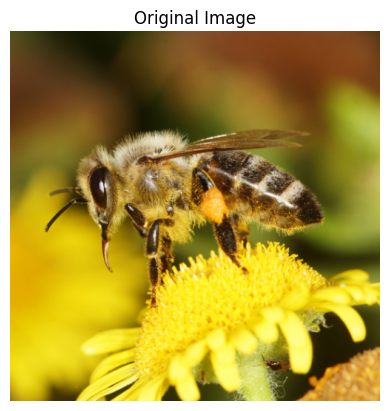

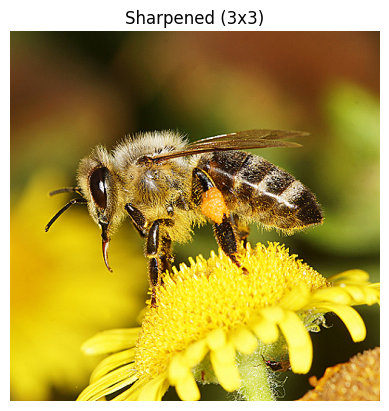

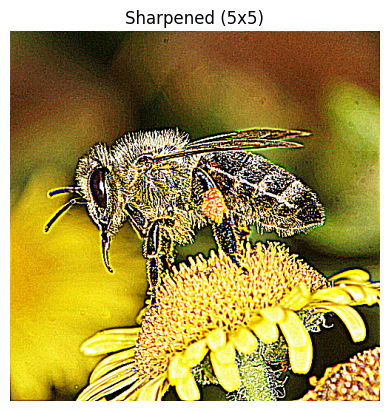

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_img(image, title=''):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def apply_custom_sharpening(image, kernel_size):
    # Define the custom sharpening kernels
    if kernel_size == 3:
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
    elif kernel_size == 5:
        kernel = np.array([[-1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1],
                           [-1, -1, 25, -1, -1],
                           [-1, -1, -1, -1, -1],
                           [-1, -1, -1, -1, -1]])

    # Apply the custom kernel using the filter2D function
    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image

# Step 1: Read the image
image_path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\native-bee.png"
image = cv2.imread(image_path)

# Step 2: Apply custom sharpening with a 3x3 kernel
sharpened_3x3 = apply_custom_sharpening(image, kernel_size=3)

# Step 3: Apply custom sharpening with a 5x5 kernel
sharpened_5x5 = apply_custom_sharpening(image, kernel_size=5)

# Step 4: Display the images using the show_img function
show_img(image, title="Original Image")
show_img(sharpened_3x3, title="Sharpened (3x3)")
show_img(sharpened_5x5, title="Sharpened (5x5)")


## exercise 4

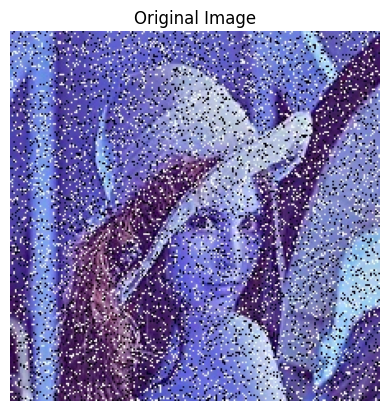

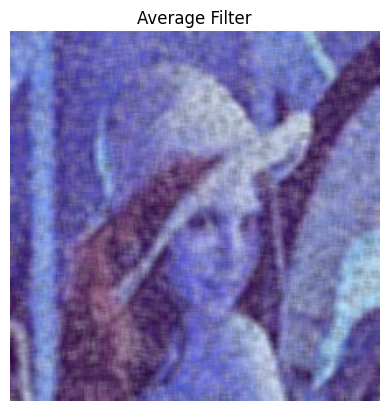

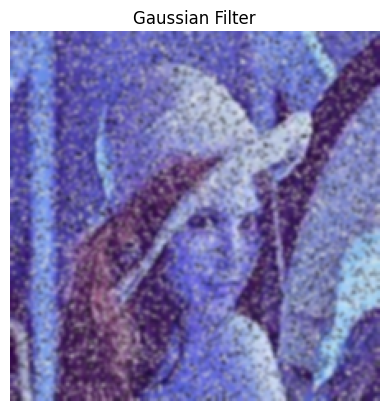

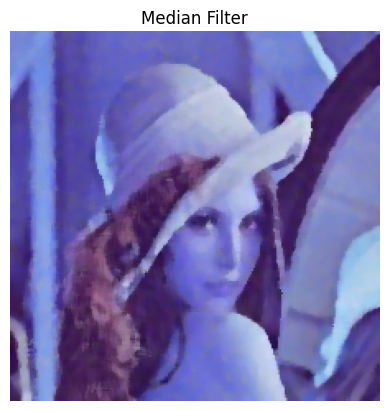

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_img(image, title=''):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 1: Read the 'noise_lena.jpg' image
image_path = r"C:\Users\User\Documents\Y3S1\MINI PROJECT\WEEK 5\noise_lena.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Step 2: Apply different smoothing techniques

# 1. Average Filter
average_filtered = cv2.blur(image, (5, 5))

# 2. Gaussian Kernel
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)

# 3. Median Filter
median_filtered = cv2.medianBlur(image, 5)

# Step 3: Display the original and smoothed images using the show_img function
show_img(image, title='Original Image')
show_img(average_filtered, title='Average Filter')
show_img(gaussian_filtered, title='Gaussian Filter')
show_img(median_filtered, title='Median Filter')
